# Importar Librerias

In [69]:
# Para graficar
import numpy as np
import matplotlib.pyplot as plt
# Las principales de PyTorch
import torch 
import torch.nn as nn
import torch.nn.functional as F # Son puras funciones 
# Otras más de PyTorch

# Puedes manipular tus datosd con estas funciones 
from torch.utils.data import DataLoader #Para dividir nuestros datos
from torch.utils.data import sampler # Para muestrar datos
import torchvision.datasets as dataset # Para importar DataSets
import torchvision.transforms as T # Para aplicar transformaciones a nuestros datos

print('Listo')

Listo


# Importart MNIST Dataset
Las GPU son los equipos ideales para  entrenar las redes neuronales. 
Creamos Minibatch para crear conjuntos de imagenes o de datos, que sean potencia de 2, las imagenes deben ser de 28x28 de un solo canal. 
Mnist son 70,000 imagenes de entrenamiento, 

1. Crear un dataset ( se usa la función T.ToTensor() que es un arreglo multidimensional para normalizar)
2. Crear un objeto de Tipo Dataloader que va crear los batches ( toma los primero 55000 imagenes para entrenar de manera random)

* Entrenamiento primero
* Evaluación de los daros segundo
* Prueba de los valores tercero, se ocupa este al final

In [70]:
NUM_TRAIN = 55000
BATCH_SIZE = 512

# Get our training, validation and test data.
# data_path = '/media/josh/MyData/Databases/' #use your own data path, you may use an existing data path to avoid having to download the data again.
data_path = 'K://😈😈😈//PYTHON//DEEP_LEARNING'
'''
TREANING
'''
mnist_train = dataset.MNIST(data_path, train=True, download=True,
                             transform=T.ToTensor())
loader_train = DataLoader(mnist_train, batch_size=BATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
'''
EVALUETION 
'''
mnist_val = dataset.MNIST(data_path, train=True, download=True,
                           transform=T.ToTensor())
loader_val = DataLoader(mnist_val, batch_size=BATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 60000)))
'''
TESTING
'''
mnist_test = dataset.MNIST(data_path, train=False, download=True, 
                            transform=T.ToTensor())
loader_test = DataLoader(mnist_test, batch_size=BATCH_SIZE)

# Uso del DataLoader 
Vamos a dividir el banco de imagenes:
* → 55,000 de Entrenamiento
* → 5,000 de Evaluación 
* → 10,000 de Prueba

Los minibaches ya están creados, solo asignamos los datos. 
<br>
Y_TEST es una lista de 10,000 valores son de la clase correcta.
<br>
X_TEST es un datoloader de 10,000 imagenes de 28x28.

In [71]:
y_test=loader_test.dataset.targets
x_test=loader_test.dataset.data
print(y_test.shape)
print(x_test.shape)


torch.Size([10000])
torch.Size([10000, 28, 28])


Sabemos que cada minibach es de 512 como lo señalizamos de un canal de 28x28 
<br>
10,000/512 → 19.5 → 20 batches 

In [72]:
for it, (x, y) in enumerate(loader_test):
    print(f'{it} X.shape is {x.shape}, y.shape is {y.shape}')

0 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
1 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
2 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
3 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
4 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
5 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
6 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
7 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
8 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
9 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
10 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
11 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
12 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.Size([512])
13 X.shape is torch.Size([512, 1, 28, 28]), y.shape is torch.

Como se utilizan redes neuronales simples, debemos de desenrollar las imagenes en un vector de pixeles

In [73]:
input_features = len(torch.flatten(x_test[0]))
input_features # tamaño del vector a ocupar

784

# Función de graficar numero

In [74]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.show()
    plt.axis('off')


# Función hacer la gráfica de numeros de forma aleatoria

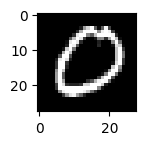

C:\Users\KOKAS\AppData\Local\Temp\ipykernel_13224\3272549464.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(samples, len(classes), plt_idx)


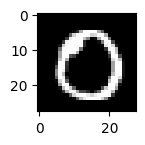

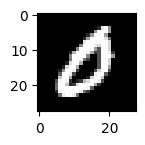

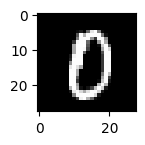

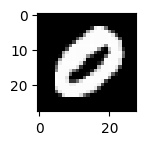

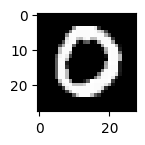

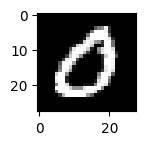

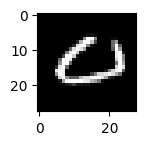

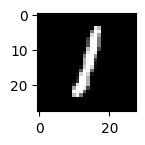

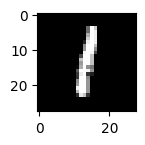

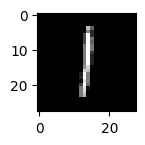

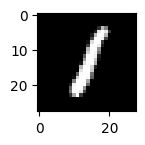

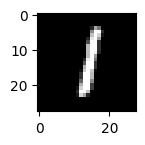

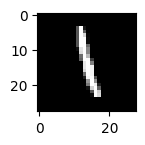

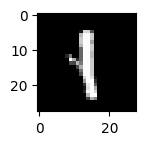

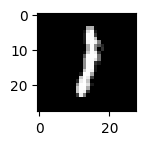

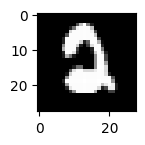

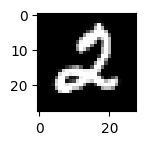

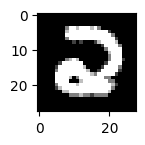

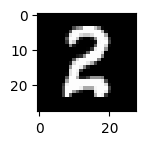

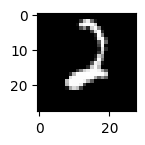

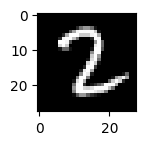

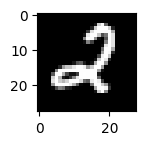

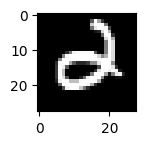

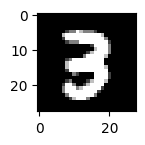

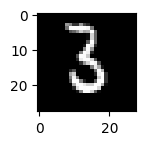

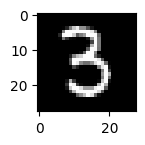

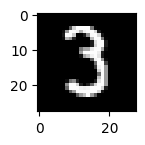

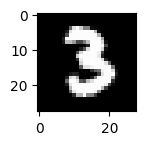

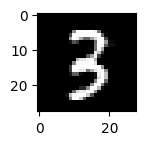

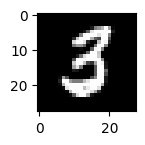

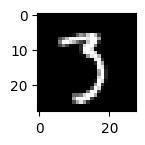

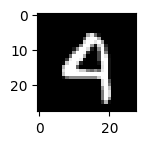

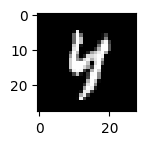

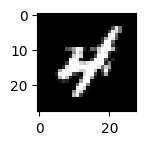

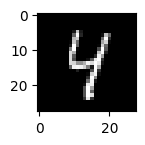

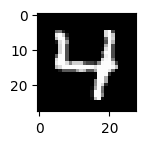

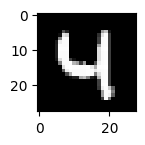

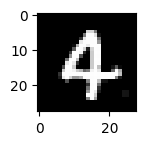

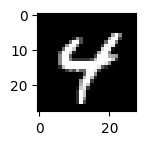

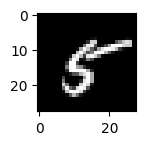

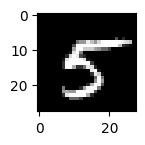

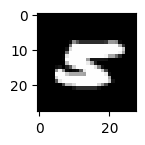

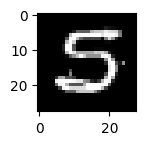

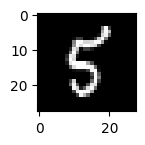

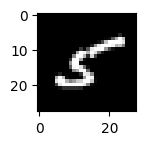

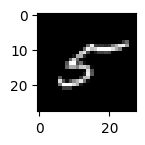

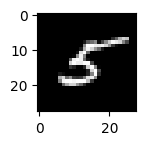

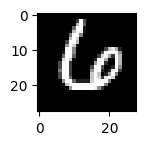

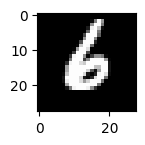

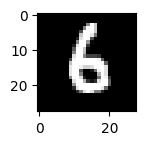

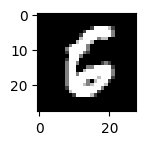

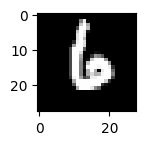

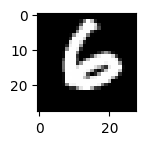

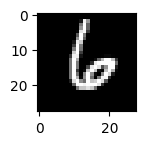

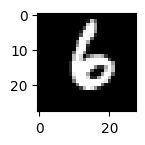

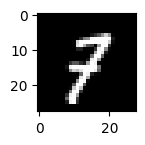

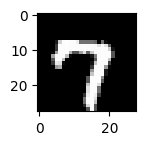

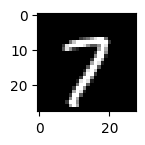

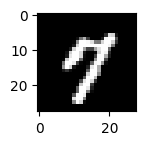

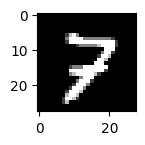

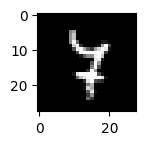

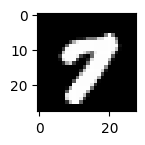

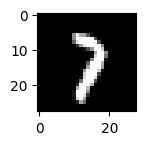

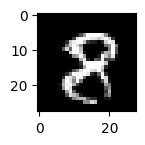

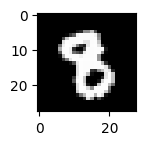

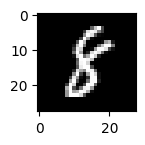

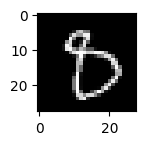

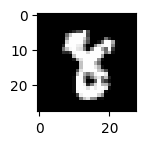

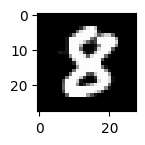

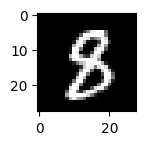

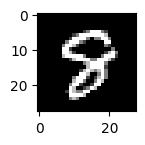

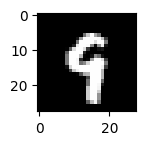

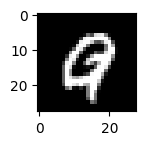

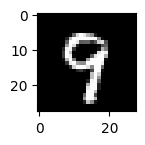

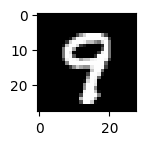

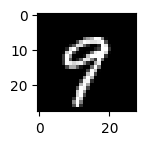

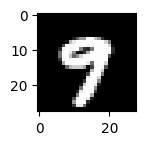

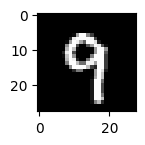

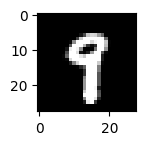

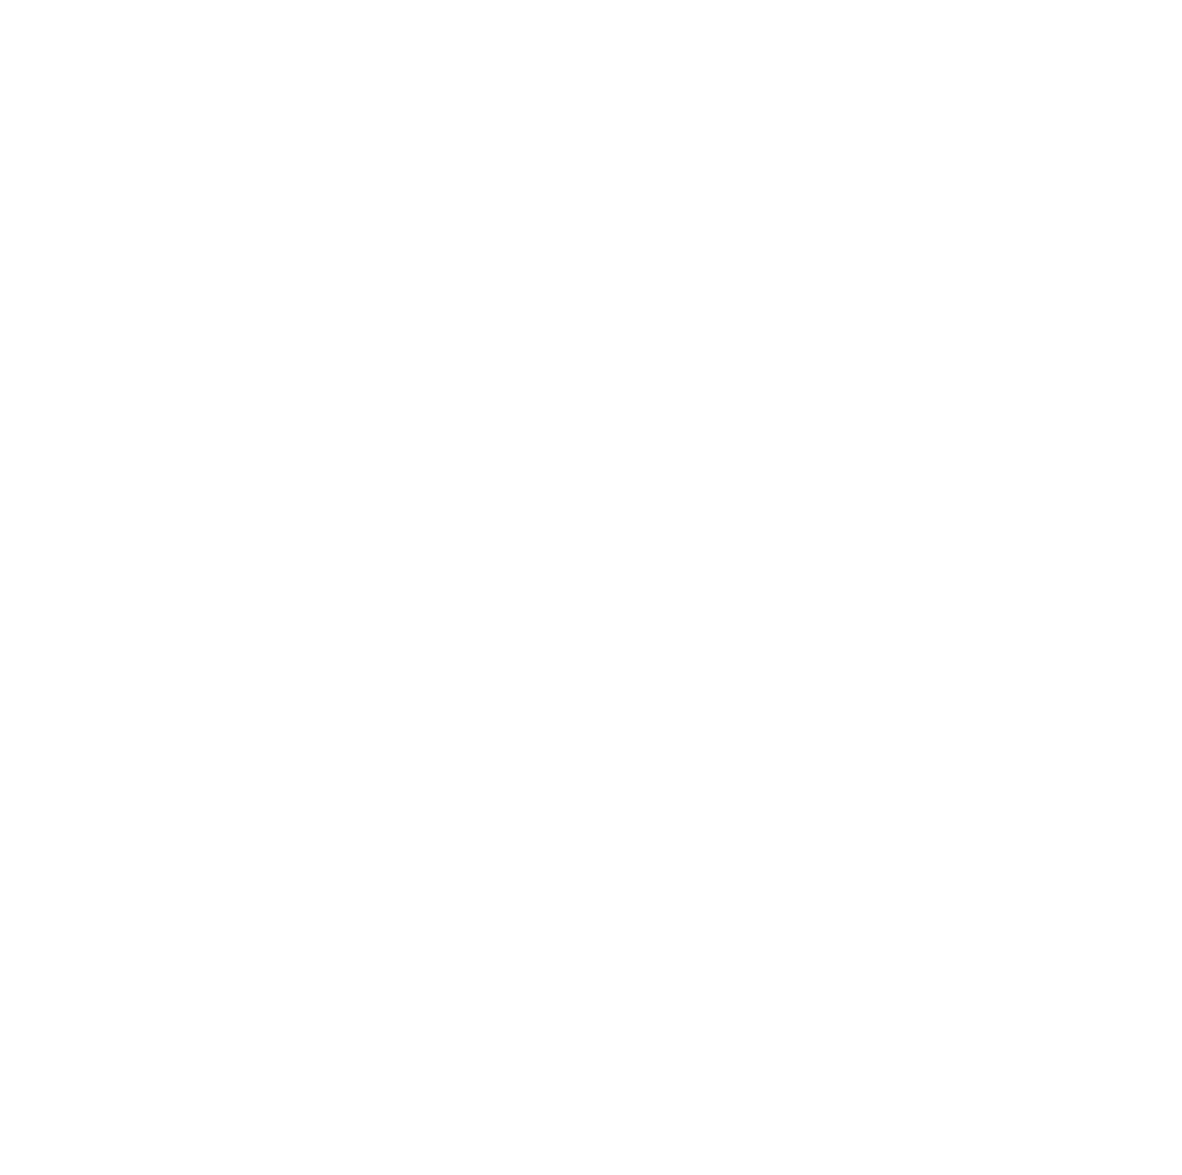

In [75]:
def plot_mnist_grid():
    y_test=loader_test.dataset.targets
    x_test=loader_test.dataset.data
    samples = 8
    plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
    classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    for label, example in enumerate(classes):
    #     random_idx = np.random.randint(0,len(mnist_test))
        plt_idxs = np.flatnonzero(y_test == label) # get all data equal to label
        plt_idxs = np.random.choice(plt_idxs, samples, replace=False) #muestrea samples muestras de plt_idx
    #     print(plt_idxs)
        for i, idx in enumerate(plt_idxs):
            plt_idx = i*len(classes) + label + 1 #plot index starts at 1
            plt.subplot(samples, len(classes), plt_idx)
    #         print(example, i, plt_idx)
    #         plt.imshow(x_test[idx].type(torch.float32).reshape(28,28))
    #         plt.axis('off')
            plot_number(x_test[idx])
            if i == 0:
                plt.title(example)

    plt.show()
plot_mnist_grid()

# Función para mostrar una imagen sola 

La imagen muestreada representa un: 9


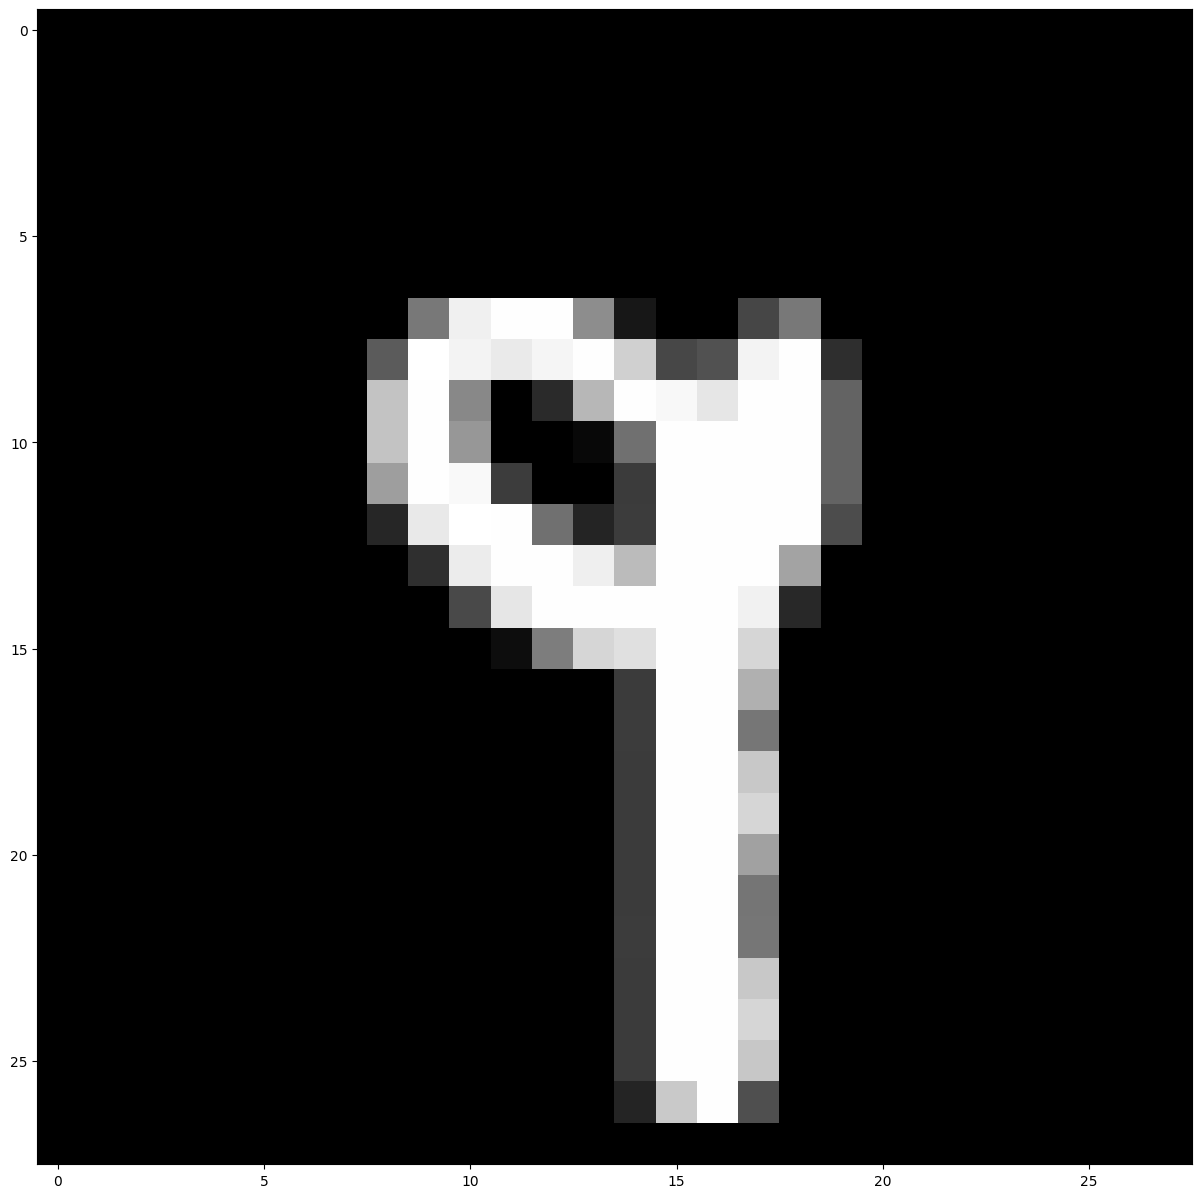

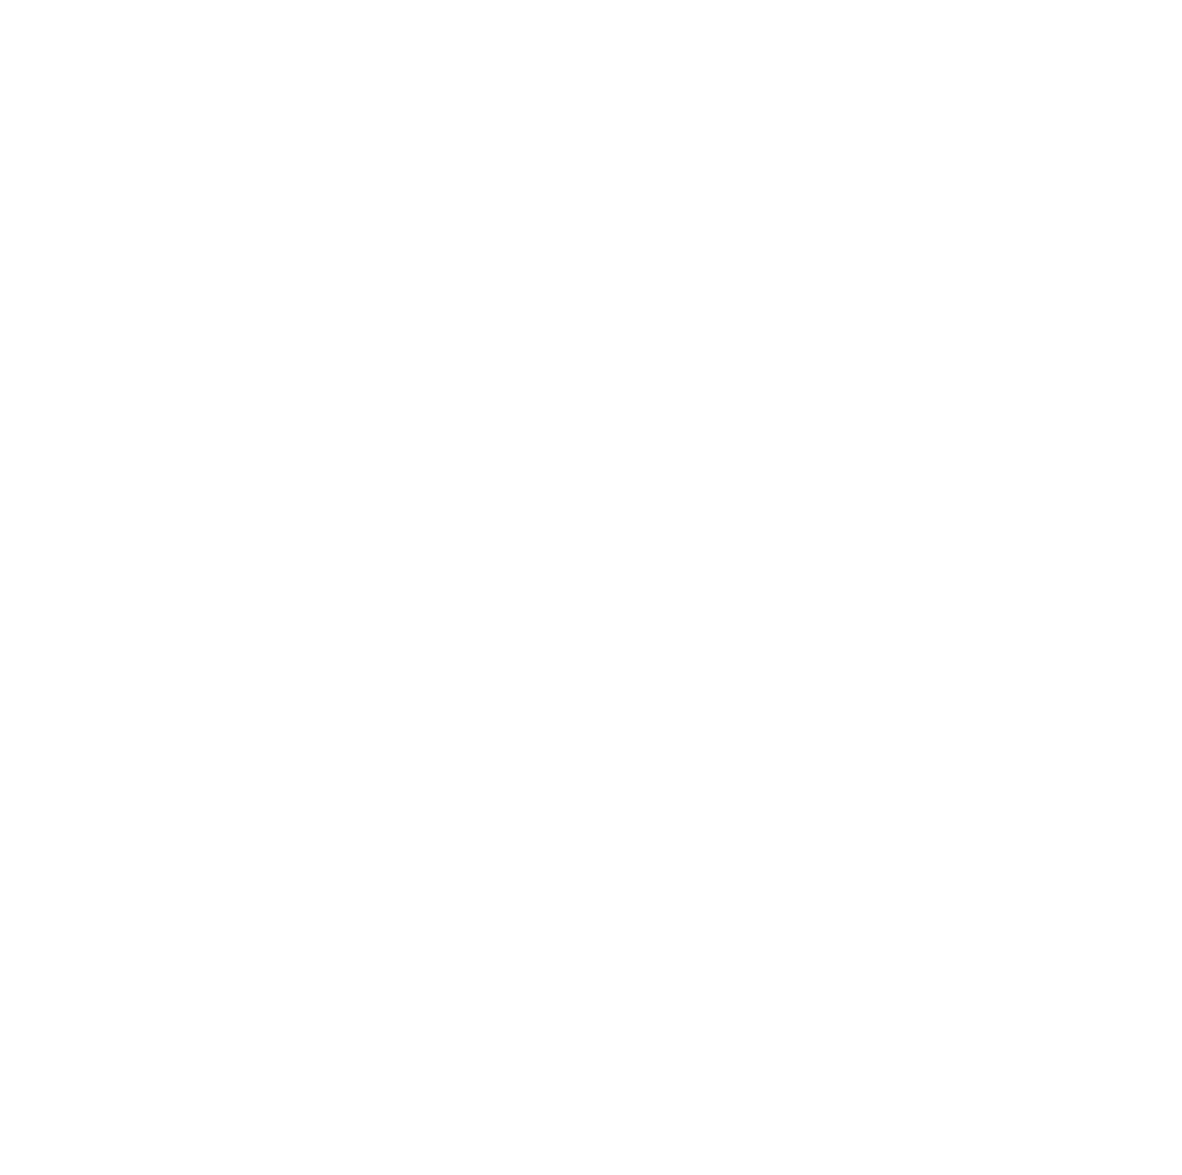

In [76]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx]}')
plot_number(x_test[rnd_idx])

# GPUs Unida de (Procesamiento Gráfico)

Sección para poder usar la gpu o cpu, dependiendo de tu hardware


In [77]:
dtype = torch.float32
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cpu


# Función para calcular la precisión del modelo

In [78]:
def compute_acc(loader, model, eval_mode=False):
    num_correct = 0
    num_total = 0
    if eval_mode: model.eval()

    # Solo estamos evaluando 
    with torch.no_grad():
        for x, y in loader:
            # pasarlo al procesamiento del hardware sea cpu o gpu 
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)

            # sin comvertir a linealidades 
            scores = model(x)
            _, pred = scores.max(1)

            assert pred.shape == y.shape, 'Label shape and prediction shape does not match'
            
            num_correct += (pred==y).sum()
            num_total += pred.size(0)           
            
        return float(num_correct)/num_total

# Modelo de Alto Nivel

Sequential se crea las funciones o pasos para entrenar nuestro modelo. 
<center><img src="img/1.png"> </center>

In [79]:
input_features = len(torch.flatten(x_test[0]))
hidden = 1000
num_classes = 10
model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=input_features, out_features=hidden),
    nn.ReLU(),
    nn.Linear(in_features=hidden,out_features=num_classes),
    )

# Funciones - Graficar el la función perdida y función entrenamiento

In [80]:
def plot_loss(losses):  
    fig = plt.figure()
    f1 = fig.add_subplot()
    f1.set_ylabel("Cost")
    f1.set_xlabel("Epoch")
    f1.set_title("Cost vs Epoch")
    f1.plot(losses)
    plt.show()
    
def train(model, optimizer, epochs=100):
    model = model.to(device=device)
    losses = []
    
    num_batches = len(loader_train)

    # epoch es cuando nuetro modelo pasa todos los minisbatches
    for epoch in range(epochs):
        accum_loss = 0.
        for i, (x, y) in enumerate(loader_train):
            #poner modelo en modo de entrenamiento
            model.train()
            #mover a GPU o dispositivo 
            x = x.to(device=device, dtype=dtype)
            y = y.to(device=device, dtype=torch.long)
            
            #calcular scores, mandaar a llamr el modelo 
            scores = model1(x)
            # Función de costo resive la salida del modelo y la etiqueta correcta
            cost = F.cross_entropy(input= scores,target=y)

            #calcular gradients
            optimizer.zero_grad()
            cost.backward()
            
            #actualizar parametros
            optimizer.step()
            
            #guardar pérdida
            accum_loss += cost.item()
        losses.append(accum_loss / num_batches)
            
        print(f'Epoch: {epoch}, loss: {cost.item()}, val accuracy: {compute_acc(loader_val, model, True)} ')
        print()
    plot_loss(losses)

Epoch: 0, loss: 1.9668242931365967, val accuracy: 0.74 

Epoch: 1, loss: 1.5594912767410278, val accuracy: 0.7962 

Epoch: 2, loss: 1.2350441217422485, val accuracy: 0.8344 

Epoch: 3, loss: 0.9409992098808289, val accuracy: 0.8618 

Epoch: 4, loss: 0.766120970249176, val accuracy: 0.8778 

Epoch: 5, loss: 0.6643878221511841, val accuracy: 0.8862 

Epoch: 6, loss: 0.623959481716156, val accuracy: 0.8934 

Epoch: 7, loss: 0.6092629432678223, val accuracy: 0.8992 

Epoch: 8, loss: 0.4733673632144928, val accuracy: 0.9026 

Epoch: 9, loss: 0.5578207969665527, val accuracy: 0.906 



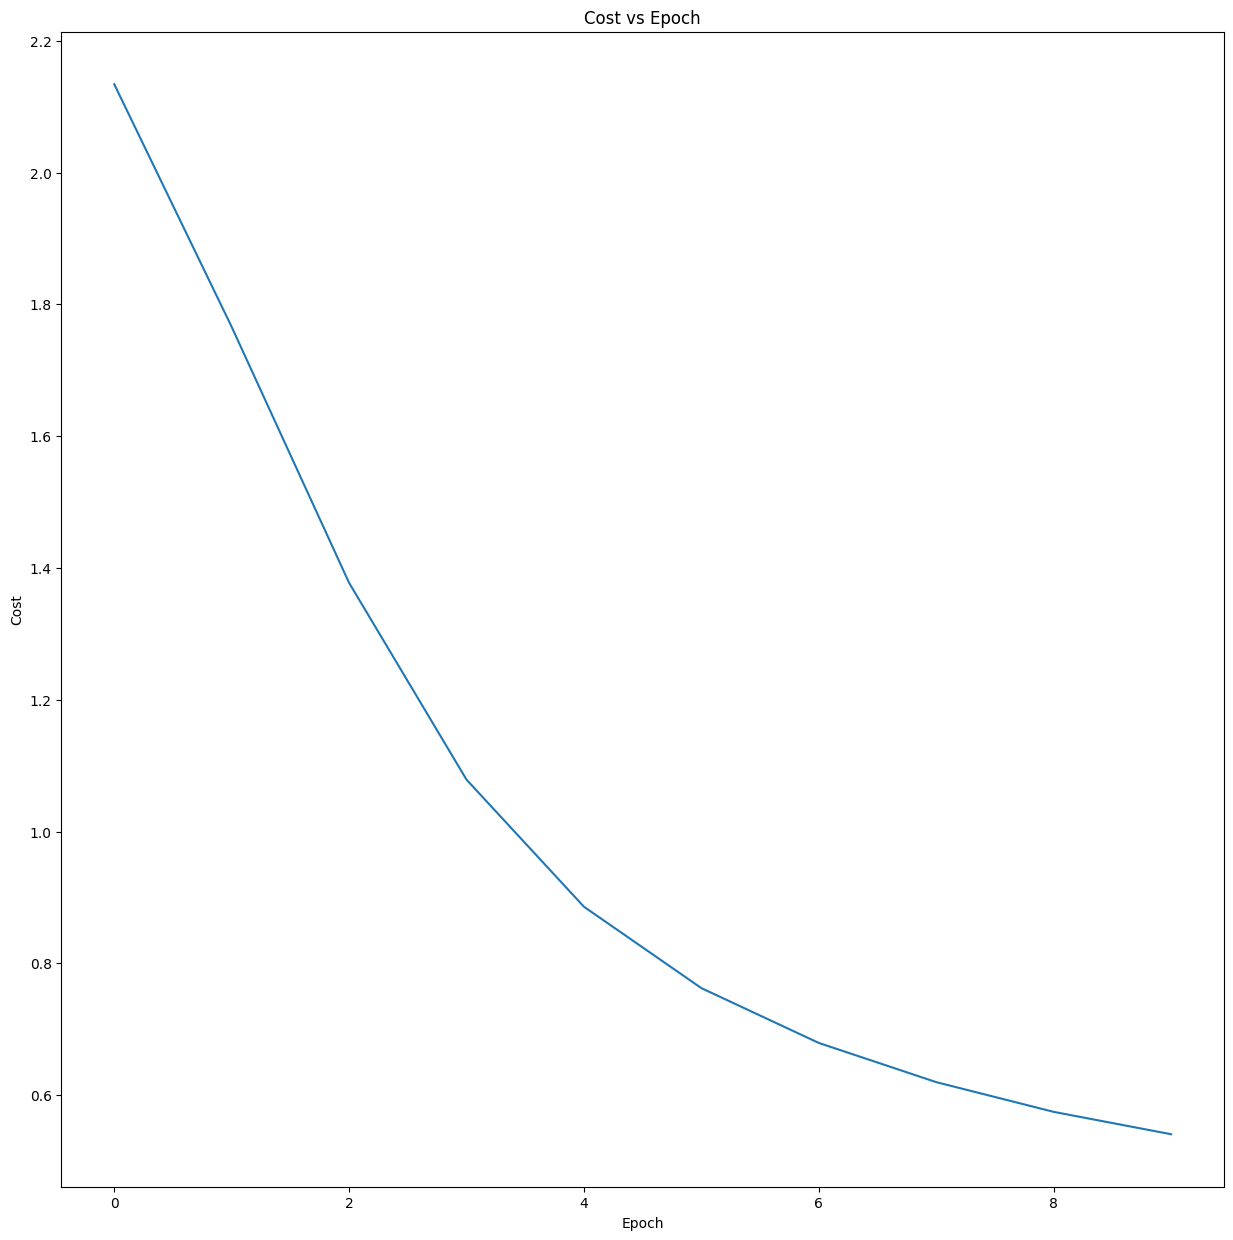

In [81]:
#entrenar el modelo
learning_rate = 1e-2
epochs = 10
optimiser = torch.optim.SGD(model1.parameters(), lr=learning_rate)
train(model1, optimiser, epochs)

# MÁS ELEGANTE 

In [82]:
class FC_model(nn.Module):
    def __init__(self, input_features, hidden = 1000, num_classes=10):
        super().__init__()
        self.model = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(in_features=input_features, out_features=hidden),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden,out_features=num_classes),
                    )
    def forward(self, x):
        return self.model(x)

Epoch: 0, loss: 0.13040019571781158, val accuracy: 0.9654 

Epoch: 1, loss: 0.05963905528187752, val accuracy: 0.973 

Epoch: 2, loss: 0.03104911744594574, val accuracy: 0.9772 

Epoch: 3, loss: 0.016126250848174095, val accuracy: 0.978 

Epoch: 4, loss: 0.012910556979477406, val accuracy: 0.981 

Epoch: 5, loss: 0.02173454873263836, val accuracy: 0.9798 

Epoch: 6, loss: 0.05172170698642731, val accuracy: 0.9786 

Epoch: 7, loss: 0.013550693169236183, val accuracy: 0.978 

Epoch: 8, loss: 0.06158364564180374, val accuracy: 0.9782 

Epoch: 9, loss: 0.06356055289506912, val accuracy: 0.981 



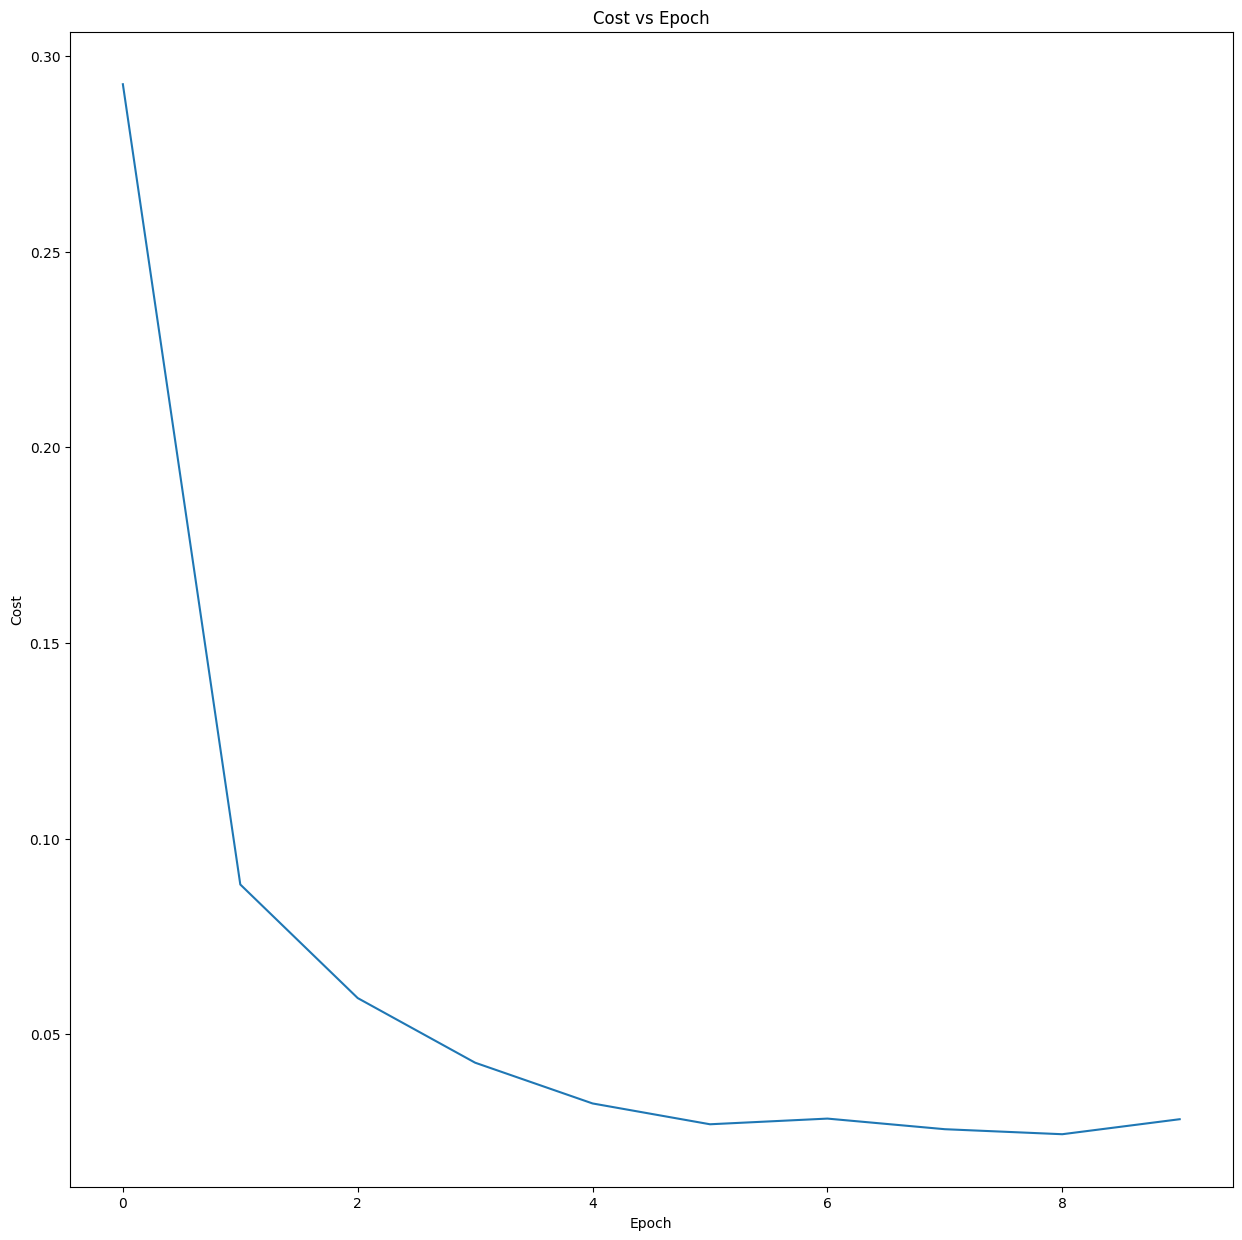

In [96]:
#Entrenar modelo
input_features = len(torch.flatten(x_test[0]))
hidden = 1000
num_classes = 10
learning_rate = 1e-2
epochs = 10
model1 = FC_model(input_features)
optimiser = torch.optim.Adam(model1.parameters(), lr = learning_rate)
# optimiser = torch.optim.SGD(model2.parameters(), lr = learning_rate)
train(model1, optimiser, epochs)

TESTING

In [97]:
compute_acc(loader_test,model1)

0.978

# Guardamos el modelo

In [98]:
model_path = 'K://😈😈😈//PYTHON//DEEP_LEARNING//model1.pth'
torch.save(model1.state_dict(), model_path)

In [99]:

input_features = len(torch.flatten(x_test[0]))
loaded_model = FC_model(input_features=input_features)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model = loaded_model.to(device=device)
loaded_model.eval()

FC_model(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=1000, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1000, out_features=10, bias=True)
  )
)

3


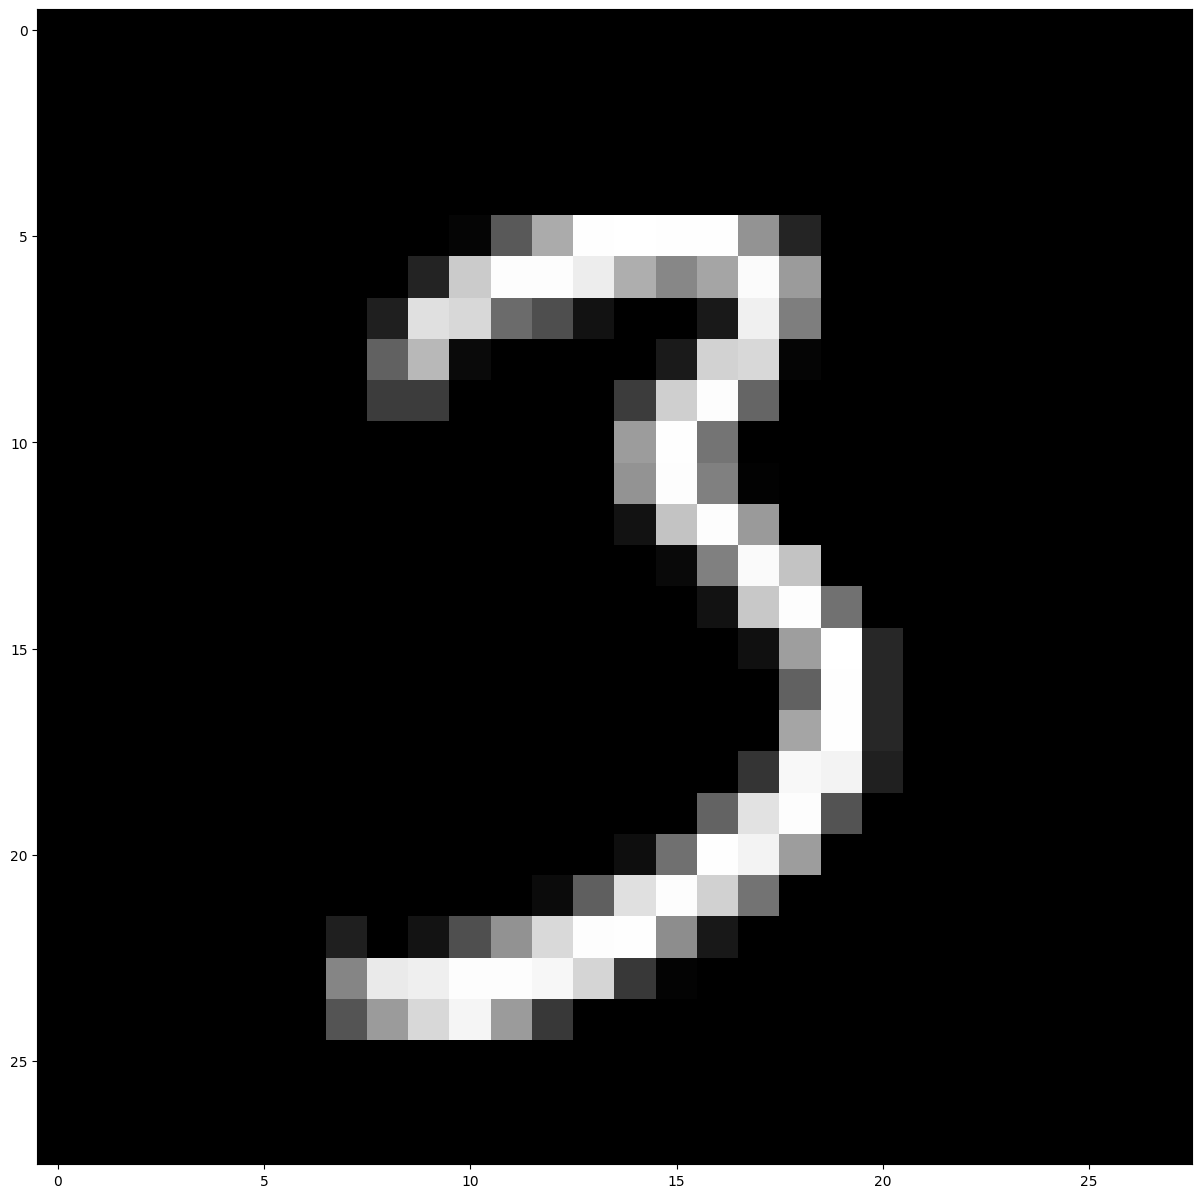

The predicted class is: 3


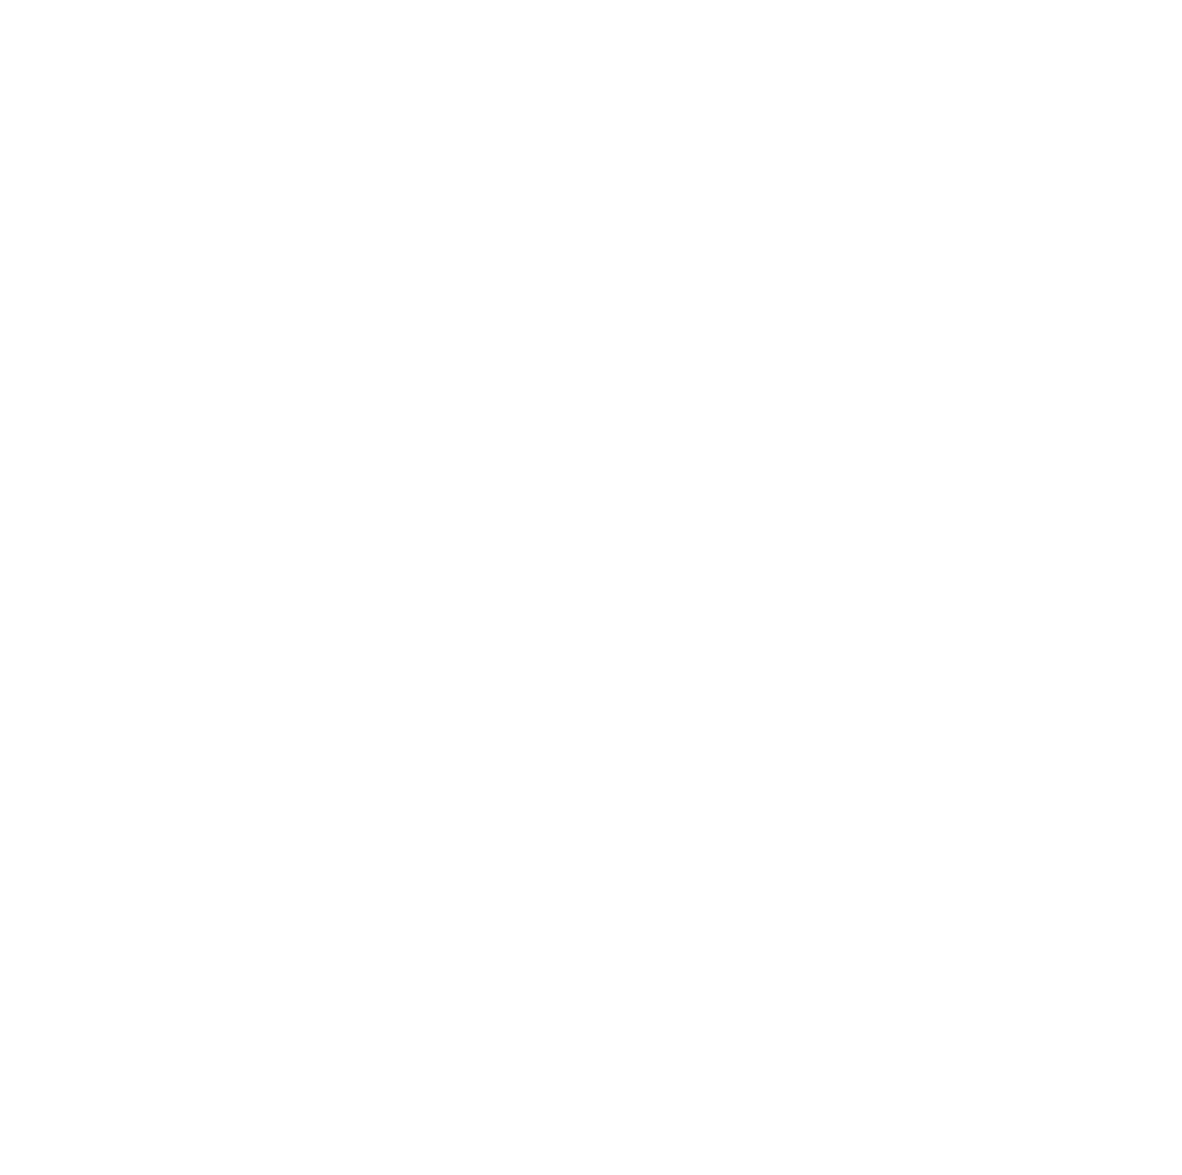

In [105]:
def sample_number():
    rnd_idx = np.random.randint(10000)
    print(f'{y_test[rnd_idx]}')
    image2 = x_test[rnd_idx][None, :,:]
    plot_number(image2)
    image2 = image2.type(torch.float32)
    return image2.to(device=device)

image=sample_number()
_, class_is = loaded_model(image).max(1)
print(f'The predicted class is: {class_is[0]}')